In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='intro'></a>

## Overview of regularization

---

The goal of "regularizing" regression models is to **structurally prevent overfitting by imposing a penalty on the coefficients** of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on **the size of coefficients** to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a balance between the error between:
1. predictions and true values
2. the size of the coefficients. 

The two most common types of regularization are the **Lasso**, **Ridge**. There is a mixture of them called the **Elastic Net**. We will take a look at the mathematics of regularization and the effect these penalties have on model fits.

<img src="https://www.evernote.com/l/AAH_btO8DnBF8I9__sqWwamIflWoyht43OoB/image.png"
     width=500px>

From ISLR, Ch. 6

The image on the left represents regularization via the Lasso. The image on the right regularization via a Ridge Regression.

The red lines represent countours of a paraboloid signifying the loss function. 

The point in the center is the nadir of the paraboloid and represents the minimum of the loss function.

The trick with regularization is to get as close to the bottom of the paraboloid while staying within the area defined by the regularization function. One interpretation of this is think of the regularizataion as a "budget". We want to get to the center of the paraboloid, but we have to stay within our budget to do so. 

<a id='lsq-loss'></a>

## Review: least squares loss function

---

Ordinary least squares regression minimizes the residual sum of squares (RSS) to fit the data:

### $$\mathcal{L}(\beta) = \sum_{i=1}^n \epsilon_i^2 =  (y-X\beta)^T(y-X\beta)$$

<a id='ridge'></a>

## The Ridge penalty

---

Ridge regression adds the sum of the squared (non-intercept!) $\beta$ values to the loss function:

### $$\mathcal{L}_{ridge}(\beta) = \sum_{i=1}^n \epsilon_i^2 +\lambda\sum\beta_i^2 =  (y-X\beta)^T(y-X\beta)+\lambda\beta^T\beta $$

Now, to fit the $\beta$ vector we will minimize $\mathcal{L}_{ridge}(\beta)$. 

Again, we take the derivative so that 

### $$ \frac{d }{d \beta} \mathcal{L}(\beta)= 
2X^TX\beta
-2X^Ty +2\lambda\beta$$

And set the result equal to zero so that 

### $$ X^TX\beta+\lambda\beta=X^Ty $$

### $$ (X^TX+\lambda I)\beta=X^Ty $$

Then

### $$\beta = (X^TX+\lambda I)^{-1}X^Ty$$

or

    beta = inv(X.T.dot(X)+lambda*np.eye(n)).dot(X.T).dot(y)

Notes:

- $\beta^T\beta$ can be written as $||\beta||_2^2$ and is known as the $\ell_2$ norm.
- $\lambda$ is a constant for the _strength_ of the regularization parameter. 
- The higher this value, the greater the impact of this new component in the loss function.
- Thinking of our budget for reaching the bottom of the bowl, the **bigger** the $\lambda$, the **smaller** our budget!
- The **bigger** the $\lambda$, the **smaller** our coefficients

<a id='lasso'></a>

## The Lasso penalty

---

The Lasso regression takes a different approach. Instead of adding the sum of _squared_ $\beta$ coefficients to the RSS, it adds the sum of the _absolute values_ of the $\beta$ coefficients:

### $$\mathcal{L}_{lasso}(\beta) = \sum_{i=1}^n \rvert\epsilon_i\rvert +\lambda\sum\rvert\beta_i\rvert =  (y-X\beta)^T(y-X\beta)+\lambda\rvert\beta\rvert $$

**WARNING** $\rvert\beta\rvert$ is not differentiable.

Therefore, there is no closed form solution to the Lasso i.e. we can not solve it using Algebra!

Think about an absolute value curve.

There is a kink in this function at $x=0$ and the derivative is not continuous.

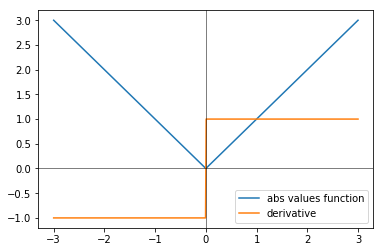

In [2]:
x = np.linspace(-3,3,500)
plt.plot(x,  np.piecewise(x, [x < 0, x >= 0], [lambda x: -x, lambda x: x]), label='abs values function')
plt.plot(x,  np.piecewise(x, [x < 0, x >= 0], [-1, 1]), label='derivative')
plt.axvline(c='black',lw=.5)
plt.axhline(c='black',lw=.5)
plt.legend()

Notes:

- $\rvert\beta\rvert$ can be written as $|\beta|_1$ and is known as the $\ell_1$ norm.
- $\lambda$ is a constant for the _strength_ of the regularization parameter. 
- The higher this value, the greater the impact of this new component in the loss function.
- Thinking of our budget for reaching the bottom of the bowl, the **bigger** the $\lambda$, the **smaller** our budget!
- The **bigger** the $\lambda$, the **smaller** our coefficients

<a id='elastic-net'></a>

## Elastic Net penalty

---

Elastic Net is simply a combination of the Lasso and the Ridge regularizations. It adds *both* penalties to the loss function:

### $$\mathcal{L}_{lasso}(\beta) = \sum_{i=1}^n \rvert\epsilon_i\rvert + \lambda\sum\rvert\beta_i\rvert+(1-\lambda)\sum\beta_i^2 $$

In the elastic net, the effect of the Ridge vs. the Lasso is balanced by the two lambda parameters. 

## What is the effect of regularization?

---

An important aspect of this data, which is a reason why we might choose to use regularization, is that there is **multicollinearity** in the data. The term multicollinearity means that there are high correlations between predictor variables in your model. 

**This can lead to a variety of problems including:**
1. The effect of predictor variables estimated by your regression will depend on what other variabes are included in your model.
2. Predictors can have wildly different effects depending on the observations in your sample, and small changes in samples can result in very different estimated effects.
3. With very high multicollinearity, the inverse matrix the computer calculates may not be accurate.
4. We can no longer interpret a coefficient on a variable as the effect on the target of a one unit increase in that variable holding the other variables constant. This is because when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

The Ridge is best suited to deal with multicollinearity. Lasso also deals with multicollinearity between variables, but in a more brutal way (it "zeroes out" the less effective variable).

The Lasso is particularly useful when you have redundant or unimportant variables. If you have 1000 variables in a dataset the Lasso can perform "feature selection" automatically for you by forcing coefficients to be zero.

### Load the wine csv

This version has red and white wines concatenated together and tagged with a binary 1,0 indicator (1 is red wine). There are many other variables purportedly related to the rated quality of the wine.

In [3]:
run src/preprocessing.py

In [5]:
dataset_2.sample(4)

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,MiscVal,YrSold,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
Id,,,,,,,,,,,,,,,,,,,,,
762,0,1,0,0,0,0,0,0,0,0,...,-0.191027,0.891266,1.891773,0.890664,-0.524722,-1.363682,-0.148195,-0.204598,-0.561646,0.083171
957,0,0,0,0,0,0,0,0,0,0,...,-0.191027,0.891266,2.072413,-4.290106,-0.713349,0.354544,-2.315999,0.800703,-0.781142,0.368333
535,0,0,0,0,0,1,0,0,0,0,...,-0.191027,-1.365857,-0.922091,-1.949426,1.318017,0.649780,0.662982,0.134907,0.819351,-0.686288
512,0,0,0,0,0,0,0,0,0,0,...,-0.191027,-1.365857,-1.793343,-2.074985,-0.189458,-1.035072,0.428460,0.032048,1.079508,-0.533963


In [6]:
target_2.shape, dataset_2.shape

((1444,), (1444, 390))

<a id='viz-ridge'></a>

## Visualizing the Ridge

---

Import the `Ridge` model class from sklearn.

In [7]:
from sklearn.linear_model import Ridge

This function iterates over a series of different alpha regularization parameters. The alpha is sklearn's equivalent of the lambda value in the formula that multiples the square of betas from the equation.

The function stores the results of the model so that we can plot them interactively.

In [8]:
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

Alpha values for the ridge are best visualized on a logarithmic "magnitude" scale. Essentially, the effect of alpha on the coefficients does not increase linearly but by orders of magnitude. 

In [73]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(-3, 12, 45)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(dataset_2, target_2, r_alphas)

The plotting function below will:

 - Plot the effect of changing alpha on the coefficient size on a **path** graph
 - Plot the effect of changing alpha on the coefficient size on a **bar** graph
 
Each one gives informative information. It's just two different ways of visualizing the same thing. The chart is interactive so you can play around with the values of alpha across the specified range above.

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
# The cycler package lets us "cycle" throug colors.
# Just another thing i had to look up on stackoverflow. That's my life.
from cycler import cycler

def coef_plotter(alphas, coefs, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    ax1.set_ylim(1E-2,1E5)
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    ax2.set_yscale('log')
    ax2.set_ylim(1E-2,1E5)
    
    # Position the bars according to their index from the feature names variable:
    
    try:
        ax2.bar(range(len(coefs[-1])), coefs[-1], align='center', color=colors)
    except ValueError:
        pass
#     ax2.set_xticks(range(1, len(feature_names)+1))
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()


Load the ipython widgets so we can make this plotting function interactive!

In [79]:
from ipywidgets import *
from IPython.display import display

The function and `interact` from ipywidgets lets me take some specified alphas that we have already calculated the coefficients for and plot them out.

In [81]:
def ridge_plot_runner(log_of_alpha=-3.0):
    coef_plotter(r_alphas, r_coefs, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(-3.0,10.0,0.33))

interactive(children=(FloatSlider(value=-3.0, description='log_of_alpha', max=10.0, min=-3.0, step=0.33), Outp…

<function __main__.ridge_plot_runner(log_of_alpha=-3.0)>

<a id='viz-lasso'></a>

## Visualizing the Lasso

---

Now we do the same thing as above but for the Lasso. You will be able to see how the coefficients change differently for both.

In [28]:
from sklearn.linear_model import Lasso

In [29]:
# This is the same as the ridge coefficient by alpha calculator
def lasso_coefs(X, Y, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X, Y)
        coefs.append(lasso_reg.coef_)
        
    return coefs


Alphas for the Lasso tend to effect regularization linearly rather than by orders of magnitude like in the ridge. 

A linear series of alphas is sufficient.

In [88]:
l_alphas = np.logspace(-3,12,45)
l_coefs = lasso_coefs(dataset_2, target_2, l_alphas)

Run the same plotting function above, but now with the calculated coefficients of alpha for the Lasso.

In [90]:
def lasso_plot_runner(log_of_alpha=-3):
    coef_plotter(l_alphas, l_coefs, 10**log_of_alpha, regtype='lasso')

interact(lasso_plot_runner, log_of_alpha=(-3.0,10.0,0.33))

interactive(children=(FloatSlider(value=-3.0, description='log_of_alpha', max=10.0, min=-3.0, step=0.33), Outp…

<function __main__.lasso_plot_runner(log_of_alpha=-3)>

In [138]:
from sklearn.model_selection import GridSearchCV

In [142]:
lasso_gs = GridSearchCV(Lasso(), param_grid={'alpha' : np.logspace(-3,5,9)}, n_jobs=-1, cv=5)
lasso_gs.fit(dataset_1, target_1)
lasso_results = pd.DataFrame(gs.cv_results_)
lasso_results.T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.304617,0.300036,0.28075,0.341139,0.205257,0.0677086,0.0245462,0.00781326,0.00712829
mean_score_time,0.00510931,0.00502658,0.00497456,0.00482826,0.00486584,0.00678992,0.00714631,0.00924625,0.00656919
mean_test_score,0.862475,0.863586,0.866499,0.870554,0.88473,0.8967,0.840823,0.659513,-0.00525042
mean_train_score,0.946966,0.946966,0.946967,0.946922,0.94541,0.930617,0.861942,0.666364,0
param_alpha,0.001,0.01,0.1,1,10,100,1000,10000,100000
params,{'alpha': 0.001},{'alpha': 0.01},{'alpha': 0.1},{'alpha': 1.0},{'alpha': 10.0},{'alpha': 100.0},{'alpha': 1000.0},{'alpha': 10000.0},{'alpha': 100000.0}
rank_test_score,6,5,4,3,2,1,7,8,9
split0_test_score,0.882291,0.882406,0.88259,0.88421,0.893752,0.899191,0.865667,0.680028,-0.00012582
split0_train_score,0.946441,0.946441,0.946442,0.946397,0.94502,0.928997,0.864476,0.665782,0
split1_test_score,0.889505,0.889631,0.890789,0.895714,0.904562,0.916498,0.878554,0.714215,-0.00080407


In [159]:
def plot_for_dataset(dataset, target, dataset_name, alphas):
    lasso_gs = GridSearchCV(Lasso(), param_grid={'alpha': alphas}, n_jobs=-1, cv=5)
    lasso_gs.fit(dataset, target)
    lasso_results = pd.DataFrame(lasso_gs.cv_results_)
    lasso_results.set_index('param_alpha', inplace=True)
    ridge_gs = GridSearchCV(Ridge(), param_grid={'alpha' : alphas}, n_jobs=-1, cv=5)
    ridge_gs.fit(dataset, target)
    ridge_results = pd.DataFrame(ridge_gs.cv_results_)
    ridge_results.set_index('param_alpha', inplace=True)

    fig, ax = plt.subplots(1,2, figsize=(20,5))
    fig.suptitle(dataset_name)

    lasso_results[['mean_train_score', 'mean_test_score']].plot(logx=True, ylim=(0.5,1.0), ax=ax[0])
    ridge_results[['mean_train_score', 'mean_test_score']].plot(logx=True, ylim=(0.5,1.0), ax=ax[1])

    lasso_max_test_score = round(lasso_results.mean_test_score.max(), 4)
    ridge_max_test_score = round(ridge_results.mean_test_score.max(), 4)

    ax[0].axhline(lasso_max_test_score, color='red', label='max')
    mid_alphas = int(len(alphas)/2+1)
    ax[0].text(alphas[mid_alphas], lasso_max_test_score + .01, str(lasso_max_test_score))
    ax[0].set_title('Lasso')
    ax[1].axhline(ridge_max_test_score, color='red', label='max')
    ax[1].text(alphas[mid_alphas], ridge_max_test_score + .01, str(ridge_max_test_score))
    ax[1].set_title('Ridge');

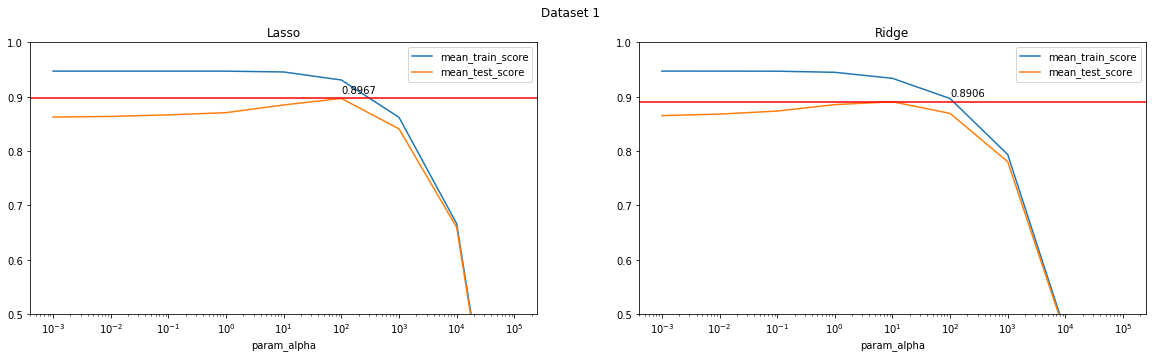

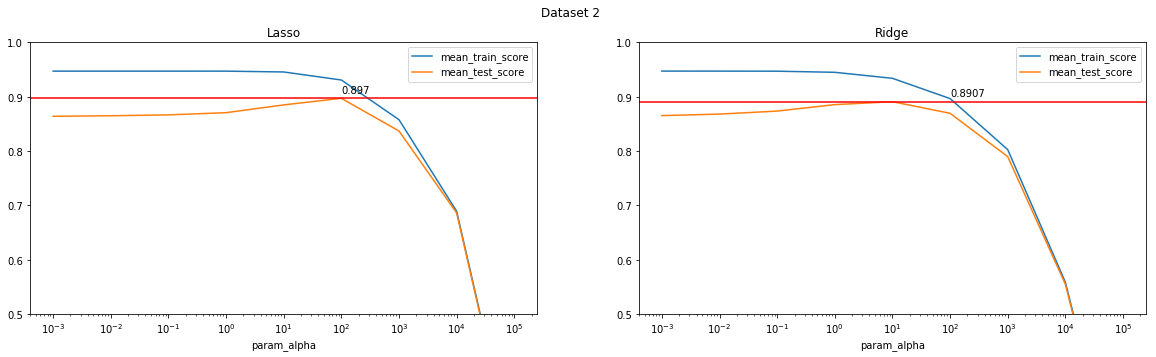

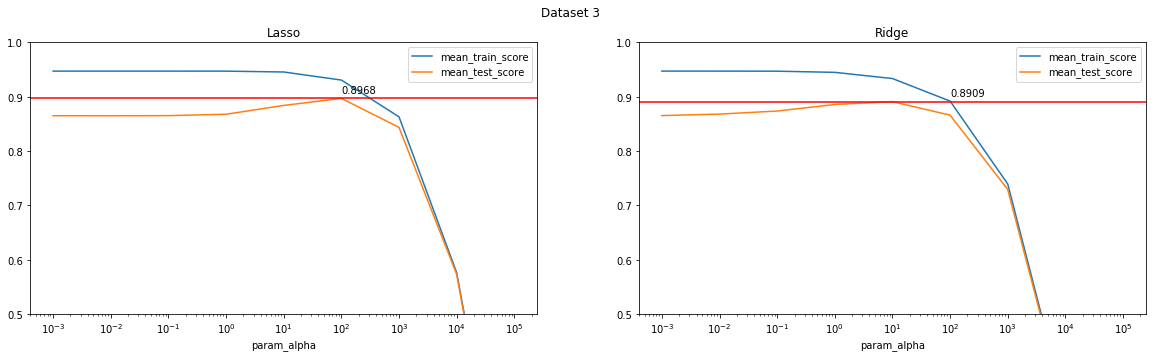

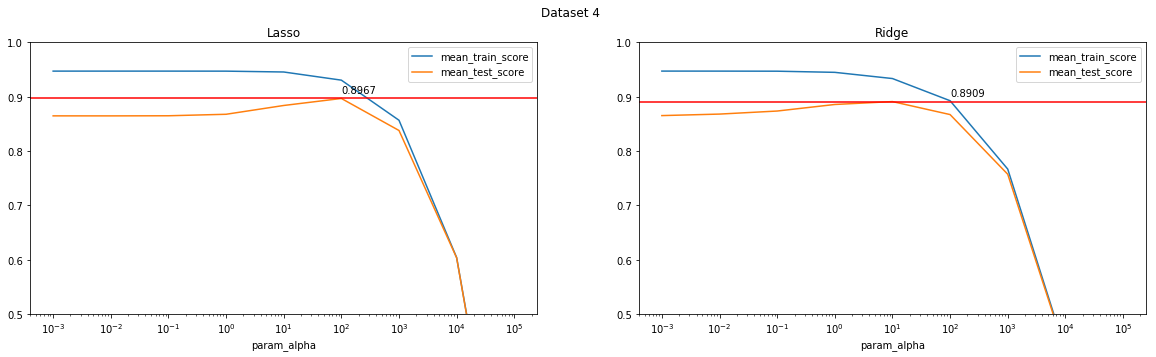

In [160]:
plot_for_dataset(dataset_1, target_1, 'Dataset 1', np.logspace(-3,5,9))
plot_for_dataset(dataset_2, target_2, 'Dataset 2', np.logspace(-3,5,9))
plot_for_dataset(dataset_3, target_3, 'Dataset 3', np.logspace(-3,5,9))
plot_for_dataset(dataset_4, target_4, 'Dataset 4', np.logspace(-3,5,9))

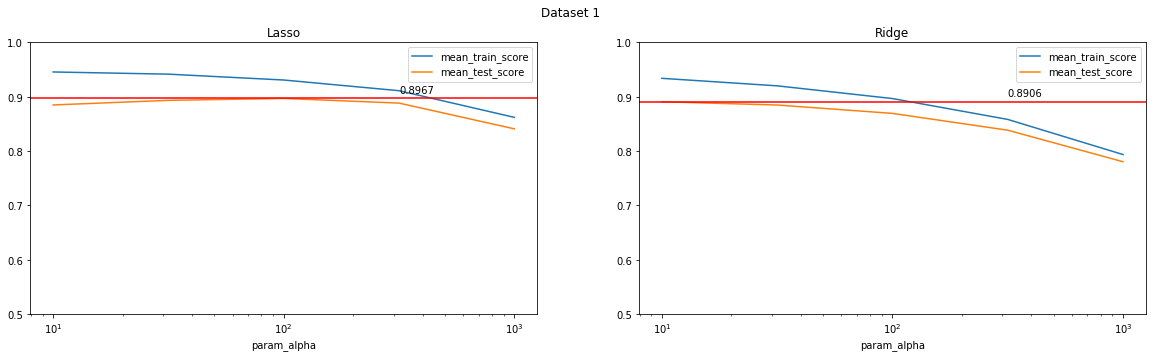

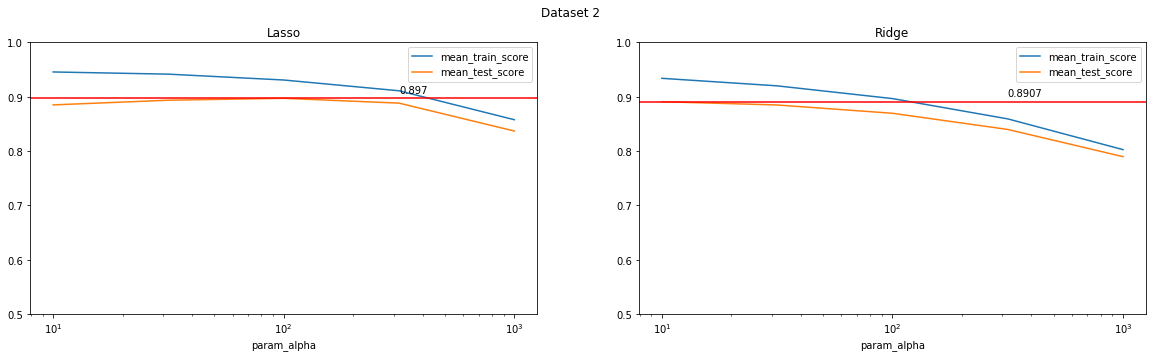

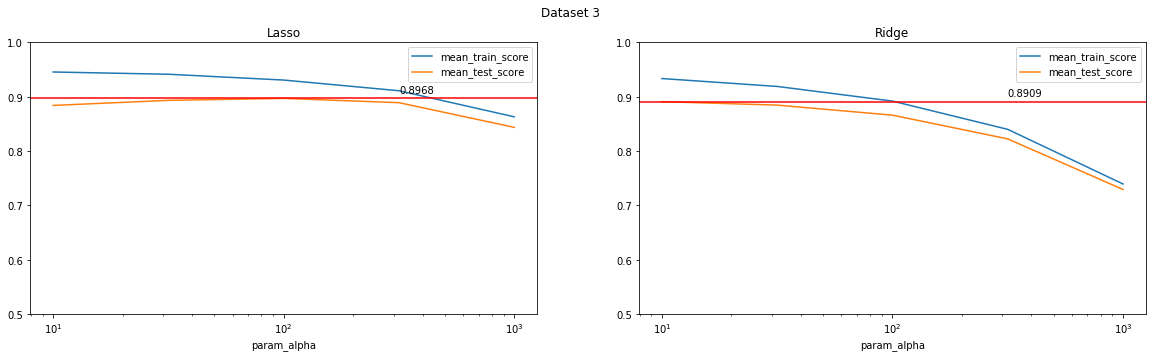

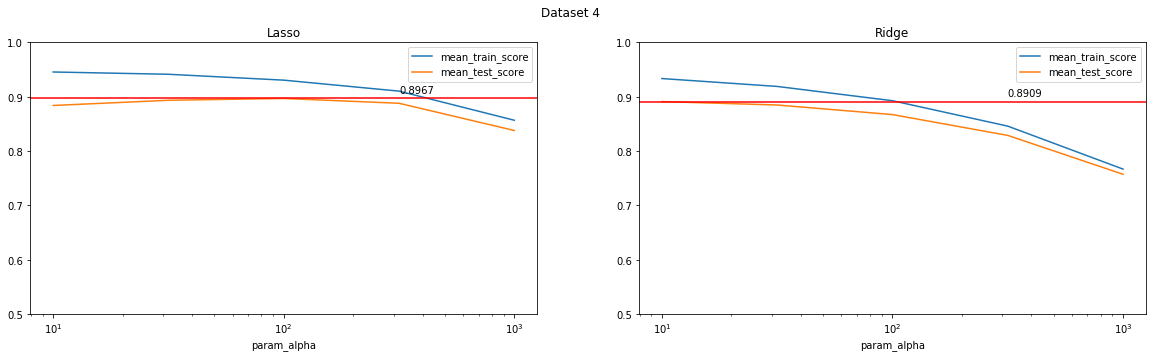

In [161]:
plot_for_dataset(dataset_1, target_1, 'Dataset 1', np.logspace(1,3,5))
plot_for_dataset(dataset_2, target_2, 'Dataset 2', np.logspace(1,3,5))
plot_for_dataset(dataset_3, target_3, 'Dataset 3', np.logspace(1,3,5))
plot_for_dataset(dataset_4, target_4, 'Dataset 4', np.logspace(1,3,5))

In [163]:
lasso_gs = GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(1,3,5)}, n_jobs=-1, cv=5)
lasso_gs.fit(dataset_2, target_2)
lasso_results = pd.DataFrame(lasso_gs.cv_results_)
lasso_results.set_index('param_alpha', inplace=True)

In [164]:
lasso_gs.best_estimator_

Lasso(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
coefficients = pd.DataFrame(lasso_gs.best_estimator_.coef_, index=dataset_2.columns, columns=['value'])
coefficients = coefficients[coefficients.value != 0 ]
coefficients.shape

(133, 1)

In [180]:
pd.options.display.max_rows = 150

In [181]:
coefficients['abs'] = np.abs(coefficients.value)
coefficients.sort_values('abs', ascending=False).head(133)

,value,abs
OverallQual_10,89809.738489,89809.738489
OverallQual_9,46169.213496,46169.213496
FullBath_3,42272.478675,42272.478675
RoofMatl_WdShngl,36271.122336,36271.122336
Neighborhood_NoRidge,32758.366218,32758.366218
Neighborhood_StoneBr,27424.243152,27424.243152
Neighborhood_Crawfor,22325.654125,22325.654125
OverallQual_8,20291.781375,20291.781375
KitchenQual_Ex,19670.231899,19670.231899
GrLivArea,18556.004132,18556.004132
